In [86]:
#import my_lib as my
import matplotlib.pyplot as plt
import numpy as np
import scipy as s
import pandas as pd
from scipy import stats
from math import log10, floor,pi,sqrt,tan

m=0.001
u=0.000001
n=0.000000001
p=0.000000000001
k=1000
M=1000000
G=1000000000
T=1000000000000

def Pw2(x):
    return np.power(x,2)

In [87]:
# Pt1 formule e costanti 

def t0_fit(b,phi,sb = 0,sphi = 0):
    t0  = -phi/b
    #t0  = (pi-phi)/b
    db   = -phi/Pw2(b) *sb
    dphi = -1/b        *sphi
    st0 = np.sqrt(Pw2(db) + Pw2(dphi))
    return t0,st0

In [114]:
# Pt1
name  =  ['Data/L2.csv','Data/L4.csv']
title = ['$Fit\    \dfrac{\lambda}{2}$','$Fit\    \dfrac{\lambda}{4}$']
div   = [1000,1000] #Divisione per misure in millivolt

bounds_min =[[0,0,4000,-1000],  
             [0,0,4000,-1000]]
bounds_max =[[3,10,15000,1000],
             [3,10,15000,1000]] 

array_t0  = np.asarray([])

def func_fit(x,b,phi,A,c):
    I = A*Pw2(np.cos(b*x + phi)) + c
    return I

0.9999999999999999 6.141592653589793 5000.000000000001 499.99999999999994
Chi2 =  1.3424650532770307e-26 | Reduced Chi2 =  2.8563086239936822e-28
theta_0 = -6.141592653589794 +- 0.039161260391973804


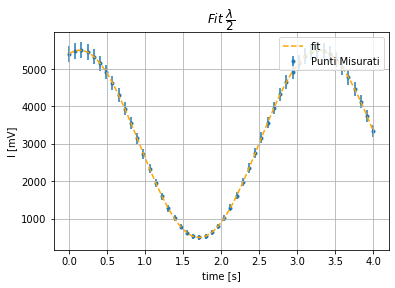

0.9999999999999999 6.141592653589793 5000.000000000001 499.99999999999994
Chi2 =  1.3424650532770307e-26 | Reduced Chi2 =  2.8563086239936822e-28
theta_0 = -6.141592653589794 +- 0.039161260391973804


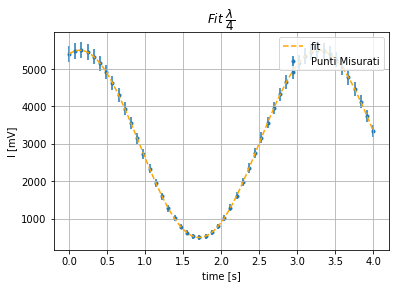

In [115]:
for T in range(len(name)):

    df= pd.read_csv(name[T])
    theta = np.asarray(df.iloc[:,0])
    I  = np.asarray(df.iloc[:,1])
    
    X = theta
    Y = I
    sY = 0.03*Y + 0.05*div[T]
    
    #Fit 
    [b,phi,A,c],pcov = s.optimize.curve_fit(func_fit,X,Y,sigma = sY,absolute_sigma = True,method = 'trf',bounds = (bounds_min[T],bounds_max[T]))
    #[b,phi,A,c],pcov = s.optimize.curve_fit(func_fit,X,Y,sigma = sY,absolute_sigma = True)
    [sb,sphi,sA,sc] = np.sqrt(np.diag(pcov))

    Yexp  = func_fit(X,b,phi,A,c)
    chi2  = np.sum( ( (Yexp - Y)/sY )**2 )
    chi2r = chi2/(len(X)-3) #3 parametri
    
    #Misure dervate
   
    theta0,stheta0 = t0_fit(b,phi,sb = sb,sphi = sphi)
    AAA = '{} +- {}'.format(theta0,stheta0)
    array_t0 = np.append(array_t0,AAA)
    
    #plot 
    x = np.linspace(np.min(X),np.max(X),100)
    y = func_fit(x,b,phi,A,c)

    plt.errorbar(X,Y,yerr=sY, ls='', marker='.',label = 'Punti Misurati', zorder = 0)
    plt.plot(x,y,label = 'fit',color = 'orange',ls = '--',zorder = 1)

    plt.title(title[T])
    plt.xlabel('time [s]')
    plt.ylabel('I [mV]')
    plt.grid()
    plt.legend(loc = 'upper right')
    
    print(b,phi,A,c)
    print('Chi2 = ',chi2,'| Reduced Chi2 = ',chi2r)
    print('theta_0 =',AAA)
    plt.show()


In [116]:
Results = pd.DataFrame({'':title,'$\theta_0 \pm \sigma$':array_t0})
#print(Results.to_latex(index=False))
Results

,,$\theta_0 \pm \sigma$
0,$Fit\ \dfrac{\lambda}{2}$,-6.141592653589794 +- 0.039161260391973804
1,$Fit\ \dfrac{\lambda}{4}$,-6.141592653589794 +- 0.039161260391973804
